In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 載入資料集

In [2]:
import os
df_train = pd.core.frame.DataFrame()
for dirname, _, filenames in os.walk('/project/xt121-group5/scene2_data/'):
    for filename in filenames:
        if dirname.split('/')[-1] != 'test_data':
            print(os.path.join(dirname, filename))
            df_train2 = pd.read_csv(os.path.join(dirname, filename))
            df_train = pd.concat([df_train, df_train2])
        
df_train = df_train.drop(labels=['RecordTime'], axis=1) # 移除 RecordTime

/project/xt121-group5/scene2_data/alice/2023-05-01 232058.csv
/project/xt121-group5/scene2_data/alice/2023-05-01 231925.csv
/project/xt121-group5/scene2_data/larry/2023-05-01 232448.csv
/project/xt121-group5/scene2_data/larry/2023-05-01 232329.csv
/project/xt121-group5/scene2_data/charlie/2023-05-05 103150_c.csv
/project/xt121-group5/scene2_data/charlie/2023-05-05 103233_nc.csv
/project/xt121-group5/scene2_data/jason/2023-05-05 151434.csv
/project/xt121-group5/scene2_data/jason/2023-05-05 151410.csv
/project/xt121-group5/scene2_data/jason/2023-05-05 145529.csv
/project/xt121-group5/scene2_data/jason/2023-05-05 145621.csv
/project/xt121-group5/scene2_data/jason/2023-05-05 145600.csv
/project/xt121-group5/scene2_data/jason/2023-05-05 145633.csv
/project/xt121-group5/scene2_data/jason/2023-05-05 145640.csv
/project/xt121-group5/scene2_data/jason/2023-05-05 151354.csv
/project/xt121-group5/scene2_data/jason/2023-05-05 151333.csv


In [3]:
print(df_train.shape)

(6681, 103)


## 檢查缺失值

In [4]:
# checked missing data
print("Before data clean(NAN mount):", len(np.where(np.isnan(df_train)==1)[0]))

Before data clean(NAN mount): 0


In [5]:
# Find columns with only unique value.
# unique_col = []
# for i in df_train.columns:
#     if np.unique(df_train[i]).shape[0]==1:
#         print(f'Get column {i} with only unique value.')
#         unique_col.append(i) 

In [6]:
# print(unique_col)

In [7]:
# df_train.describe()[unique_col]

In [8]:
# Drop columns with only unique value.
# df_train = df_train.drop(unique_col, axis=1)

## 資料前處理

In [9]:
# 列出不重要的特徵。
# 先假設除了gaze vector以外的特徵都不重要，之後再調整。
del_col = ['FaceBoundingBox_X', 'FaceBoundingBox_Y','FaceBoundingBox_W', 'FaceBoundingBox_H', 'FaceLandmarks_1_X', 
           'FaceLandmarks_1_Y', 'FaceLandmarks_2_X','FaceLandmarks_2_Y', 'FaceLandmarks_3_X', 'FaceLandmarks_3_Y', 
           'FaceLandmarks_4_X', 'FaceLandmarks_4_Y','FaceLandmarks_5_X', 'FaceLandmarks_5_Y', 'FaceLandmarks_6_X', 
           'FaceLandmarks_6_Y', 'FaceLandmarks_7_X', 'FaceLandmarks_7_Y', 'FaceLandmarks_8_X', 'FaceLandmarks_8_Y', 
           'FaceLandmarks_9_X', 'FaceLandmarks_9_Y', 'FaceLandmarks_10_X', 'FaceLandmarks_10_Y', 'FaceLandmarks_11_X', 
           'FaceLandmarks_11_Y', 'FaceLandmarks_12_X', 'FaceLandmarks_12_Y', 'FaceLandmarks_13_X', 'FaceLandmarks_13_Y', 
           'FaceLandmarks_14_X', 'FaceLandmarks_14_Y', 'FaceLandmarks_15_X', 'FaceLandmarks_15_Y', 'FaceLandmarks_16_X', 
           'FaceLandmarks_16_Y', 'FaceLandmarks_17_X', 'FaceLandmarks_17_Y', 'FaceLandmarks_18_X', 'FaceLandmarks_18_Y', 
           'FaceLandmarks_19_X', 'FaceLandmarks_19_Y', 'FaceLandmarks_20_X', 'FaceLandmarks_20_Y', 'FaceLandmarks_21_X', 
           'FaceLandmarks_21_Y', 'FaceLandmarks_22_X', 'FaceLandmarks_22_Y', 'FaceLandmarks_23_X', 'FaceLandmarks_23_Y', 
           'FaceLandmarks_24_X', 'FaceLandmarks_24_Y', 'FaceLandmarks_25_X', 'FaceLandmarks_25_Y', 'FaceLandmarks_26_X', 
           'FaceLandmarks_26_Y', 'FaceLandmarks_27_X', 'FaceLandmarks_27_Y', 'FaceLandmarks_28_X', 'FaceLandmarks_28_Y', 
           'FaceLandmarks_29_X', 'FaceLandmarks_29_Y', 'FaceLandmarks_30_X', 'FaceLandmarks_30_Y', 'FaceLandmarks_31_X', 
           'FaceLandmarks_31_Y', 'FaceLandmarks_32_X', 'FaceLandmarks_32_Y', 'FaceLandmarks_33_X', 'FaceLandmarks_33_Y', 
           'FaceLandmarks_34_X', 'FaceLandmarks_34_Y', 'FaceLandmarks_35_X', 'FaceLandmarks_35_Y', 'HeadPoseAngles_X', 
           'HeadPoseAngles_Y','HeadPoseAngles_Z', 'LeftEyeBoundingBox_X', 'LeftEyeBoundingBox_Y', 'LeftEyeBoundingBox_W', 
           'LeftEyeBoundingBox_H', 'RightEyeBoundingBox_X', 'RightEyeBoundingBox_Y', 'RightEyeBoundingBox_W', 'RightEyeBoundingBox_H', 
           'EyeLandmarks_1_X', 'EyeLandmarks_1_Y', 'EyeLandmarks_2_X', 'EyeLandmarks_2_Y', 'EyeLandmarks_3_X', 
           'EyeLandmarks_3_Y', 'EyeLandmarks_4_X', 'EyeLandmarks_4_Y', 'LeftEyeMidPoint_X', 'LeftEyeMidPoint_Y', 
           'RightEyeMidPoint_X','RightEyeMidPoint_Y', 'EyeState_Left', 'EyeState_Right']
# del_col = ['FaceBoundingBox_X', 'FaceBoundingBox_Y','FaceBoundingBox_W', 'FaceBoundingBox_H', 'HeadPoseAngles_X', 
#            'HeadPoseAngles_Y','HeadPoseAngles_Z', 'LeftEyeBoundingBox_X', 'LeftEyeBoundingBox_Y', 'LeftEyeBoundingBox_W', 
#            'LeftEyeBoundingBox_H', 'RightEyeBoundingBox_X', 'RightEyeBoundingBox_Y', 'RightEyeBoundingBox_W', 'RightEyeBoundingBox_H', 
#            'EyeLandmarks_1_X', 'EyeLandmarks_1_Y', 'EyeLandmarks_2_X', 'EyeLandmarks_2_Y', 'EyeLandmarks_3_X', 
#            'EyeLandmarks_3_Y', 'EyeLandmarks_4_X', 'EyeLandmarks_4_Y', 'LeftEyeMidPoint_X', 'LeftEyeMidPoint_Y', 
#            'RightEyeMidPoint_X','RightEyeMidPoint_Y', 'EyeState_Left', 'EyeState_Right']

In [10]:
df_train = df_train.drop(del_col, axis = 1)

In [11]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

In [12]:
# def data_preprocessing(df_input, train=True, sc=None):
#     # numeric feature standardization
#     if train:
#         sc = StandardScaler()
# #         sc = MinMaxScaler()
#         df = sc.fit_transform(df_input.iloc[:, 0:-1])
#     else:
#         df = sc.transform(df_input)
#     return df, sc

In [13]:
# X, train_sc = data_preprocessing(df_train)

In [14]:
# print(X.shape)

In [15]:
# print(train_sc.mean_)

In [16]:
# print(train_sc.var_)

In [17]:
y = df_train['RecordType'].values

In [18]:
print(y.shape)

(6681,)


In [19]:
np.unique(y)
print(y)

[0 0 0 ... 0 0 0]


In [20]:
df_train = df_train.drop('RecordType', axis = 1)

## 切割訓練集

In [21]:
npa_train = df_train.to_numpy()

In [22]:
x_train , x_valid , y_train , y_valid = train_test_split(npa_train, y, test_size=0.25, random_state=17, stratify=y)

In [23]:
# eval_metrics can selecy rmse, logloss, error,\
# auc, merror, mlogloss or custom define
eval_set = [(x_valid, y_valid)]
model = XGBClassifier(early_stopping_rounds=10,
                      eval_metric="auc")
print(type(x_train))
print(type(y_train))
model.fit(x_train,
          y_train,
          eval_set=eval_set,
          verbose=True)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]	validation_0-auc:0.928259
[1]	validation_0-auc:0.929899
[2]	validation_0-auc:0.931955
[3]	validation_0-auc:0.934859
[4]	validation_0-auc:0.935243
[5]	validation_0-auc:0.936977
[6]	validation_0-auc:0.93672
[7]	validation_0-auc:0.937368
[8]	validation_0-auc:0.93839
[9]	validation_0-auc:0.938617
[10]	validation_0-auc:0.940584
[11]	validation_0-auc:0.944141
[12]	validation_0-auc:0.944209
[13]	validation_0-auc:0.946537
[14]	validation_0-auc:0.947219
[15]	validation_0-auc:0.947188
[16]	validation_0-auc:0.947756
[17]	validation_0-auc:0.948467
[18]	validation_0-auc:0.948741
[19]	validation_0-auc:0.948105
[20]	validation_0-auc:0.950286
[21]	validation_0-auc:0.950337
[22]	validation_0-auc:0.950943
[23]	validation_0-auc:0.951553
[24]	validation_0-auc:0.951593
[25]	validation_0-auc:0.953969
[26]	validation_0-auc:0.954009
[27]	validation_0-auc:0.95415
[28]	validation_0-auc:0.955067
[29]	validation_0-auc:0.955493
[30]	validation_0-auc:0.955778
[31]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              eval_metric='auc', gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [24]:
# model.predict_proba will return the probility
# model.predict will return the predict label (use 0.5 as threshold)
y_pred = model.predict_proba(x_valid)
y_pred[:5]

array([[0.10285163, 0.8971484 ],
       [0.05653495, 0.94346505],
       [0.60133314, 0.39866686],
       [0.9870012 , 0.01299882],
       [0.943161  , 0.05683896]], dtype=float32)

In [25]:
# we use model.predict to get the label
y_pred = model.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.62%


In [26]:
# we can show the feature importances for our features
print(model.feature_importances_)

[0.05738485 0.12551497 0.8171001 ]


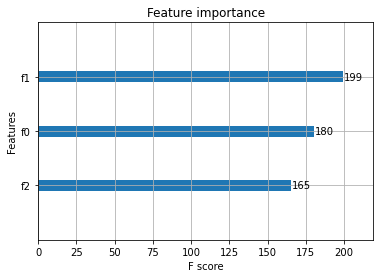

In [27]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [28]:
!pip install graphviz

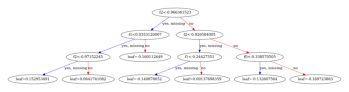

In [29]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

plot_tree(model, num_trees=1)
# plt.title("max_depth = 100, with gamma = 10")
# plt.savefig("tree_with_max_depth_gamma", dpi = 700)

## 模型測試

In [30]:
# Test
# 測試一個答案全部為1的資料。
df_test = pd.read_csv('/project/xt121-group5/scene2_data/test_data/2023-05-06 135830_c.csv')
# df_test = df_test.drop(unique_col, axis=1)
df_test = df_test.drop(del_col, axis=1)
df_test = df_test.drop(labels=['RecordTime'], axis=1)
df_test = df_test.drop(labels=['RecordType'], axis=1)
# test, _ = data_preprocessing(df_test, train=False, sc=train_sc)

In [31]:
print(df_test.columns)
npa_test = df_test.to_numpy()
pred = model.predict(npa_test)
print(pred.shape)
print(type(pred))

Index(['GazeVector_X', 'GazeVector_Y', 'GazeVector_Z'], dtype='object')
(280,)
<class 'numpy.ndarray'>


In [32]:
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
# Test
# 測試一個答案全部為0的資料。
df_test = pd.read_csv('/project/xt121-group5/scene2_data/test_data/2023-05-06 135847_nc.csv')
# df_test = df_test.drop(unique_col, axis=1)
df_test = df_test.drop(del_col, axis=1)
df_test = df_test.drop(labels=['RecordTime'], axis=1)
df_test = df_test.drop(labels=['RecordType'], axis=1)
# test, _ = data_preprocessing(df_test, train=False, sc=train_sc)

In [34]:
npa_test = df_test.to_numpy()
pred = model.predict(npa_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 儲存模型

### 方法1. joblib

In [35]:
# Save model
import joblib
joblib.dump(model, './XGB_joblib_model')

# Load model
loaded_xgb_model = joblib.load('./XGB_joblib_model')
pred = loaded_xgb_model.predict(npa_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 方法2. save_model

In [36]:
# Save model
model.save_model('XGB_model.json')

# Load model
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.load_model('XGB_model.json')
pred = model_xgb.predict(npa_test)
print(pred)

[0.02612224 0.02612224 0.00914999 0.02612224 0.02945598 0.02945598
 0.02945598 0.02945598 0.02945598 0.02945598 0.02945598 0.02945598
 0.02945598 0.02464708 0.02945598 0.02945598 0.02945598 0.02945598
 0.02945598 0.02945598 0.02464708 0.02945598 0.02945598 0.02945598
 0.02945598 0.00811508 0.00551024 0.00551024 0.00262081 0.00551024
 0.00262081 0.00262081 0.00551024 0.00551024 0.00551024 0.00262081
 0.00262081 0.00551024 0.00321178 0.00551024 0.00551024 0.00534863
 0.00551024 0.00551024 0.00551024 0.00262081 0.00551024 0.00262081
 0.00262081 0.05683896 0.00262081 0.00275963 0.00272644 0.00272644
 0.00272644 0.00272644 0.00275963 0.00515198 0.0134538  0.02714706
 0.02714706 0.02222891 0.02714706 0.02299299 0.02239843 0.01221444
 0.0109884  0.02714706 0.02714706 0.02553104 0.02035781 0.1478044
 0.02239843 0.01221444 0.01203906 0.00826922 0.02222891 0.01299882
 0.02222891 0.0121206  0.02714706 0.02456365 0.16518784 0.02714706
 0.02746936 0.02714706 0.01165526 0.01226675 0.01034371 0.01034

In [37]:
import xgboost
xgboost.__version__

'0.90'

In [38]:
# Test
# 測試一個答案全部為0的資料。
df_test = pd.read_csv('/project/xt121-group5/DAiSEE/0/1100131017.csv')
# df_test = df_test.drop(unique_col, axis=1)
df_test = df_test.drop(del_col, axis=1)
df_test = df_test.drop(labels=['RecordTime'], axis=1)
df_test = df_test.drop(labels=['RecordType'], axis=1)
# test, _ = data_preprocessing(df_test, train=False, sc=train_sc)
npa_test = df_test.to_numpy()
pred = model.predict(npa_test)
print(pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 1]


In [40]:
mean_a = pred.mean()
print(mean_a)

0.35


In [54]:
amount = 0
acc =0
for dirname, _, filenames in os.walk('/project/xt121-group5/DAiSEE/3'):
    for filename in filenames:
        if dirname.split('/')[-1] != 'test_data':
            #print(os.path.join(dirname, filename))
            testdata = os.path.join(dirname, filename)
            df_test = pd.read_csv(testdata)
            # df_test = df_test.drop(unique_col, axis=1)
            df_test = df_test.drop(del_col, axis=1)
            df_test = df_test.drop(labels=['RecordTime'], axis=1)
            df_test = df_test.drop(labels=['RecordType'], axis=1)
            # test, _ = data_preprocessing(df_test, train=False, sc=train_sc)
            npa_test = df_test.to_numpy()
            pred = model.predict(npa_test)
            mean_a = pred.mean()
            print(mean_a)
            amount += 1
            if mean_a >0.5:
                acc += 1
print(f'total acc: {acc/amount}')


0.93
0.9533333333333334
0.7133333333333334
0.7733333333333333
0.09
0.0
0.03
0.7833333333333333
0.6
0.91
0.9933333333333333
0.013333333333333334
0.79
0.8166666666666667
0.75
0.0033333333333333335
0.9766666666666667
0.95
0.6933333333333334
0.5233333333333333
0.9066666666666666
0.0
0.6233333333333333
0.8666666666666667
0.5433333333333333
0.99
0.6133333333333333
0.99
0.0
1.0
0.43
0.006666666666666667
0.9466666666666667
0.7933333333333333
0.8466666666666667
0.5733333333333334
0.8333333333333334
0.57
0.09666666666666666
0.9
0.9366666666666666
0.6666666666666666
0.0
0.9133333333333333
0.8833333333333333
0.9033333333333333
0.16
0.45666666666666667
0.85
0.0
0.07666666666666666
0.8966666666666666
0.04666666666666667
0.35333333333333333
0.7466666666666667
0.27702702702702703
0.7633333333333333
0.006666666666666667
0.9566666666666667
0.4166666666666667
0.8766666666666667
0.31333333333333335
1.0
0.9766666666666667
0.02666666666666667
0.0033333333333333335
0.09666666666666666
0.6933333333333334
0.02